In [1]:
"""

This is for morphological classification of galaxies by CNN,
New regresssion for B/D ratio
By Kenji Bekki, on 2018/3/30

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
### Added 2018/3/30
from keras.applications import imagenet_utils
from keras.models import load_model
###
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (100*1) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model '))
#nmodel=nmodel0*iset
#epochs=int(input('Input the number of epochs'))
iset=5
nmodel0=100
epochs=3000
nmodel=nmodel0*iset
nmodel=1000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 200
num_classes = 2
#epochs = 500
nb_epoch=epochs
n_mesh=50
#n_mesh=20
#nmodel=4000

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)
#stop



#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(y_test.shape[0], 'y.test samples')
#print(str(y_test[0]))
#print(str(y_test[1]))
#print(str(y_test[2]))

#y_train = y_train.astype('int32')
#y_test = y_test.astype('int32')
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

# This is for simlation data sets

with open('2dft.dat') as f:
  lines=f.readlines()
with open('2dftn1.dat') as f:
  lines1=f.readlines()
with open('2dftn2.dat') as f:
  lines2=f.readlines()


x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
#y_train=np.zeros(nmodel,dtype=np.int)
#y_test=np.zeros(nmodel,dtype=np.int)
y_train=np.zeros((nmodel,2))
y_test=np.zeros((nmodel,2))
#y_test=np.zeros(nmodel)
#print(y_train)

# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

# For morphological map (theta)
ibin=0
for num,j in enumerate(lines1):
  tm=j.strip().split()
  y_train[ibin,0]=float(tm[0])
  y_test[ibin,0]=float(tm[0])
#  y_train[ibin]=int(tm[0])-1
#  y_test[ibin]=int(tm[0])-1
#  print('ibin, (Morpholigcl type)',ibin,y_train[ibin])
  ibin+=1

# For morphological map (phi)
ibin=0
for num,j in enumerate(lines2):
  tm=j.strip().split()
  y_train[ibin,1]=float(tm[0])
  y_test[ibin,1]=float(tm[0])
#  y_train[ibin]=int(tm[0])-1
#  y_test[ibin]=int(tm[0])-1
#  print('ibin, (Morpholigcl type)',ibin,y_train[ibin])
  ibin+=1



x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# For laelling
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print('Galaxy type',y_train[:5])

#stop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### For labelling of morphological types

#model.add(Dense(num_classes, activation='softmax'))
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

### For regression of B/D

model.add(Dense(2, activation='linear'))
#model.add(Dense(1))
#model.add(Activation=('linear'))
#model.add(activation=('linear'))
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")






nmodel 1000
50 50 2499
Galaxy type [[4.15999413 3.1924963 ]
 [4.15999413 3.1924963 ]
 [4.15999413 3.1924963 ]
 [4.15999413 3.1924963 ]
 [4.15999413 3.1924963 ]]
Epoch 1/3000
5/5 [==============================] - 3s 274ms/step - loss: 32.6641 - accuracy: 0.4820 - val_loss: 32.6213 - val_accuracy: 0.5310
Epoch 2/3000
5/5 [==============================] - 0s 46ms/step - loss: 32.1349 - accuracy: 0.4728 - val_loss: 32.4602 - val_accuracy: 0.5300
Epoch 3/3000
5/5 [==============================] - 0s 46ms/step - loss: 32.7399 - accuracy: 0.4992 - val_loss: 32.2887 - val_accuracy: 0.5300
Epoch 4/3000
5/5 [==============================] - 0s 45ms/step - loss: 32.0350 - accuracy: 0.4683 - val_loss: 32.1086 - val_accuracy: 0.5300
Epoch 5/3000
5/5 [==============================] - 0s 44ms/step - loss: 32.2164 - accuracy: 0.5081 - val_loss: 31.9210 - val_accuracy: 0.5300
Epoch 6/3000
5/5 [==============================] - 0s 44ms/step - loss: 32.7995 - accuracy: 0.4825 - val_loss: 31.7265 - v

Epoch 57/3000
5/5 [==============================] - 0s 68ms/step - loss: 9.7276 - accuracy: 0.5142 - val_loss: 8.5685 - val_accuracy: 0.5300
Epoch 58/3000
5/5 [==============================] - 0s 68ms/step - loss: 10.0229 - accuracy: 0.5027 - val_loss: 8.4717 - val_accuracy: 0.5300
Epoch 59/3000
5/5 [==============================] - 0s 46ms/step - loss: 9.6913 - accuracy: 0.5079 - val_loss: 8.3976 - val_accuracy: 0.5300
Epoch 60/3000
5/5 [==============================] - 0s 47ms/step - loss: 9.6475 - accuracy: 0.5113 - val_loss: 8.3288 - val_accuracy: 0.5300
Epoch 61/3000
5/5 [==============================] - 0s 45ms/step - loss: 9.3363 - accuracy: 0.5262 - val_loss: 8.2769 - val_accuracy: 0.5300
Epoch 62/3000
5/5 [==============================] - 0s 46ms/step - loss: 9.3767 - accuracy: 0.5189 - val_loss: 8.2388 - val_accuracy: 0.5300
Epoch 63/3000
5/5 [==============================] - 0s 45ms/step - loss: 9.4564 - accuracy: 0.4957 - val_loss: 8.2057 - val_accuracy: 0.5300
Epoch

5/5 [==============================] - 0s 50ms/step - loss: 9.1078 - accuracy: 0.4842 - val_loss: 8.0105 - val_accuracy: 0.5300
Epoch 115/3000
5/5 [==============================] - 0s 51ms/step - loss: 9.1458 - accuracy: 0.5186 - val_loss: 8.0133 - val_accuracy: 0.5300
Epoch 116/3000
5/5 [==============================] - 0s 50ms/step - loss: 9.3457 - accuracy: 0.4960 - val_loss: 8.0110 - val_accuracy: 0.5300
Epoch 117/3000
5/5 [==============================] - 0s 50ms/step - loss: 9.1361 - accuracy: 0.5043 - val_loss: 8.0112 - val_accuracy: 0.5300
Epoch 118/3000
5/5 [==============================] - 0s 50ms/step - loss: 9.2156 - accuracy: 0.5041 - val_loss: 8.0149 - val_accuracy: 0.5300
Epoch 119/3000
5/5 [==============================] - 0s 50ms/step - loss: 9.1980 - accuracy: 0.4901 - val_loss: 8.0123 - val_accuracy: 0.5300
Epoch 120/3000
5/5 [==============================] - 0s 51ms/step - loss: 9.3965 - accuracy: 0.5244 - val_loss: 8.0105 - val_accuracy: 0.5300
Epoch 121/3000

5/5 [==============================] - 0s 72ms/step - loss: 8.9676 - accuracy: 0.5043 - val_loss: 7.9872 - val_accuracy: 0.5300
Epoch 172/3000
5/5 [==============================] - 0s 61ms/step - loss: 8.9233 - accuracy: 0.5387 - val_loss: 7.9875 - val_accuracy: 0.5300
Epoch 173/3000
5/5 [==============================] - 0s 58ms/step - loss: 8.9869 - accuracy: 0.5012 - val_loss: 7.9869 - val_accuracy: 0.5300
Epoch 174/3000
5/5 [==============================] - 0s 59ms/step - loss: 8.9440 - accuracy: 0.5045 - val_loss: 7.9872 - val_accuracy: 0.5300
Epoch 175/3000
5/5 [==============================] - 0s 61ms/step - loss: 9.0146 - accuracy: 0.4927 - val_loss: 7.9876 - val_accuracy: 0.5300
Epoch 176/3000
5/5 [==============================] - 0s 56ms/step - loss: 9.1363 - accuracy: 0.4649 - val_loss: 7.9887 - val_accuracy: 0.5300
Epoch 177/3000
5/5 [==============================] - 0s 65ms/step - loss: 9.1050 - accuracy: 0.4960 - val_loss: 7.9894 - val_accuracy: 0.5300
Epoch 178/3000

5/5 [==============================] - 0s 50ms/step - loss: 8.3212 - accuracy: 0.5384 - val_loss: 7.9718 - val_accuracy: 0.5300
Epoch 229/3000
5/5 [==============================] - 0s 53ms/step - loss: 9.0696 - accuracy: 0.4819 - val_loss: 7.9733 - val_accuracy: 0.5300
Epoch 230/3000
5/5 [==============================] - 0s 53ms/step - loss: 8.9890 - accuracy: 0.4954 - val_loss: 7.9730 - val_accuracy: 0.5300
Epoch 231/3000
5/5 [==============================] - 0s 54ms/step - loss: 8.7539 - accuracy: 0.5313 - val_loss: 7.9716 - val_accuracy: 0.5300
Epoch 232/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.9026 - accuracy: 0.4832 - val_loss: 7.9712 - val_accuracy: 0.5300
Epoch 233/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.7136 - accuracy: 0.5151 - val_loss: 7.9722 - val_accuracy: 0.5300
Epoch 234/3000
5/5 [==============================] - 0s 49ms/step - loss: 9.0759 - accuracy: 0.4919 - val_loss: 7.9736 - val_accuracy: 0.5300
Epoch 235/3000

5/5 [==============================] - 0s 50ms/step - loss: 9.0778 - accuracy: 0.5333 - val_loss: 7.9663 - val_accuracy: 0.5300
Epoch 286/3000
5/5 [==============================] - 0s 49ms/step - loss: 9.1624 - accuracy: 0.4700 - val_loss: 7.9672 - val_accuracy: 0.5300
Epoch 287/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.9686 - accuracy: 0.5040 - val_loss: 7.9669 - val_accuracy: 0.5300
Epoch 288/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.7687 - accuracy: 0.5454 - val_loss: 7.9673 - val_accuracy: 0.5300
Epoch 289/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.9267 - accuracy: 0.5050 - val_loss: 7.9694 - val_accuracy: 0.5300
Epoch 290/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.9857 - accuracy: 0.4837 - val_loss: 7.9688 - val_accuracy: 0.5300
Epoch 291/3000
5/5 [==============================] - 0s 54ms/step - loss: 9.0035 - accuracy: 0.5150 - val_loss: 7.9677 - val_accuracy: 0.5300
Epoch 292/3000

5/5 [==============================] - 0s 50ms/step - loss: 8.7110 - accuracy: 0.5116 - val_loss: 7.9570 - val_accuracy: 0.5300
Epoch 343/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.6270 - accuracy: 0.5311 - val_loss: 7.9563 - val_accuracy: 0.5300
Epoch 344/3000
5/5 [==============================] - 0s 52ms/step - loss: 8.7665 - accuracy: 0.5171 - val_loss: 7.9547 - val_accuracy: 0.5300
Epoch 345/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.6820 - accuracy: 0.5324 - val_loss: 7.9543 - val_accuracy: 0.5300
Epoch 346/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.6671 - accuracy: 0.5479 - val_loss: 7.9551 - val_accuracy: 0.5300
Epoch 347/3000
5/5 [==============================] - 0s 53ms/step - loss: 8.7735 - accuracy: 0.5382 - val_loss: 7.9567 - val_accuracy: 0.5300
Epoch 348/3000
5/5 [==============================] - 0s 52ms/step - loss: 9.2169 - accuracy: 0.4751 - val_loss: 7.9567 - val_accuracy: 0.5300
Epoch 349/3000

5/5 [==============================] - 0s 54ms/step - loss: 8.9910 - accuracy: 0.5300 - val_loss: 7.9496 - val_accuracy: 0.5300
Epoch 400/3000
5/5 [==============================] - 0s 54ms/step - loss: 8.8250 - accuracy: 0.5059 - val_loss: 7.9485 - val_accuracy: 0.5300
Epoch 401/3000
5/5 [==============================] - 0s 53ms/step - loss: 8.7397 - accuracy: 0.4917 - val_loss: 7.9489 - val_accuracy: 0.5300
Epoch 402/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.6944 - accuracy: 0.4675 - val_loss: 7.9502 - val_accuracy: 0.5300
Epoch 403/3000
5/5 [==============================] - 0s 53ms/step - loss: 8.7103 - accuracy: 0.4808 - val_loss: 7.9490 - val_accuracy: 0.5300
Epoch 404/3000
5/5 [==============================] - 0s 53ms/step - loss: 8.8747 - accuracy: 0.5134 - val_loss: 7.9480 - val_accuracy: 0.5300
Epoch 405/3000
5/5 [==============================] - 0s 109ms/step - loss: 8.6789 - accuracy: 0.5199 - val_loss: 7.9483 - val_accuracy: 0.5300
Epoch 406/300

5/5 [==============================] - 0s 50ms/step - loss: 8.7008 - accuracy: 0.5135 - val_loss: 7.9404 - val_accuracy: 0.5300
Epoch 457/3000
5/5 [==============================] - 0s 54ms/step - loss: 9.2149 - accuracy: 0.5173 - val_loss: 7.9436 - val_accuracy: 0.5300
Epoch 458/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.8257 - accuracy: 0.5251 - val_loss: 7.9431 - val_accuracy: 0.5300
Epoch 459/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.8724 - accuracy: 0.4952 - val_loss: 7.9412 - val_accuracy: 0.5300
Epoch 460/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.8355 - accuracy: 0.5020 - val_loss: 7.9410 - val_accuracy: 0.5300
Epoch 461/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.5063 - accuracy: 0.5108 - val_loss: 7.9409 - val_accuracy: 0.5300
Epoch 462/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.8196 - accuracy: 0.5033 - val_loss: 7.9411 - val_accuracy: 0.5300
Epoch 463/3000

5/5 [==============================] - 0s 49ms/step - loss: 8.6025 - accuracy: 0.5081 - val_loss: 7.9333 - val_accuracy: 0.5300
Epoch 514/3000
5/5 [==============================] - 0s 52ms/step - loss: 8.7689 - accuracy: 0.5120 - val_loss: 7.9331 - val_accuracy: 0.5300
Epoch 515/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.4092 - accuracy: 0.5504 - val_loss: 7.9315 - val_accuracy: 0.5300
Epoch 516/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.7600 - accuracy: 0.5097 - val_loss: 7.9327 - val_accuracy: 0.5300
Epoch 517/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.6730 - accuracy: 0.5220 - val_loss: 7.9324 - val_accuracy: 0.5300
Epoch 518/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.4419 - accuracy: 0.5213 - val_loss: 7.9331 - val_accuracy: 0.5300
Epoch 519/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.7407 - accuracy: 0.5392 - val_loss: 7.9330 - val_accuracy: 0.5300
Epoch 520/3000

5/5 [==============================] - 0s 50ms/step - loss: 8.8000 - accuracy: 0.5312 - val_loss: 7.9223 - val_accuracy: 0.5300
Epoch 571/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.6585 - accuracy: 0.5249 - val_loss: 7.9242 - val_accuracy: 0.5300
Epoch 572/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.4888 - accuracy: 0.4741 - val_loss: 7.9249 - val_accuracy: 0.5300
Epoch 573/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.6549 - accuracy: 0.5488 - val_loss: 7.9251 - val_accuracy: 0.5300
Epoch 574/3000
5/5 [==============================] - 0s 50ms/step - loss: 8.9949 - accuracy: 0.4822 - val_loss: 7.9253 - val_accuracy: 0.5300
Epoch 575/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.7066 - accuracy: 0.4995 - val_loss: 7.9245 - val_accuracy: 0.5300
Epoch 576/3000
5/5 [==============================] - 0s 51ms/step - loss: 8.6450 - accuracy: 0.5197 - val_loss: 7.9246 - val_accuracy: 0.5300
Epoch 577/3000

5/5 [==============================] - 0s 49ms/step - loss: 8.5289 - accuracy: 0.5137 - val_loss: 7.9179 - val_accuracy: 0.5300
Epoch 628/3000
5/5 [==============================] - 0s 48ms/step - loss: 8.4385 - accuracy: 0.5479 - val_loss: 7.9170 - val_accuracy: 0.5330
Epoch 629/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.7935 - accuracy: 0.5373 - val_loss: 7.9174 - val_accuracy: 0.5320
Epoch 630/3000
5/5 [==============================] - 0s 48ms/step - loss: 8.7147 - accuracy: 0.5121 - val_loss: 7.9163 - val_accuracy: 0.5300
Epoch 631/3000
5/5 [==============================] - 0s 48ms/step - loss: 8.6288 - accuracy: 0.5132 - val_loss: 7.9163 - val_accuracy: 0.5300
Epoch 632/3000
5/5 [==============================] - 0s 48ms/step - loss: 9.0052 - accuracy: 0.5192 - val_loss: 7.9166 - val_accuracy: 0.5300
Epoch 633/3000
5/5 [==============================] - 0s 49ms/step - loss: 8.4466 - accuracy: 0.5285 - val_loss: 7.9152 - val_accuracy: 0.5300
Epoch 634/3000

5/5 [==============================] - 0s 61ms/step - loss: 8.5656 - accuracy: 0.4871 - val_loss: 7.9129 - val_accuracy: 0.5300
Epoch 685/3000
5/5 [==============================] - 0s 57ms/step - loss: 8.7142 - accuracy: 0.4953 - val_loss: 7.9122 - val_accuracy: 0.5350
Epoch 686/3000
5/5 [==============================] - 0s 67ms/step - loss: 8.4453 - accuracy: 0.4916 - val_loss: 7.9114 - val_accuracy: 0.5360
Epoch 687/3000
5/5 [==============================] - 0s 106ms/step - loss: 8.7423 - accuracy: 0.5065 - val_loss: 7.9095 - val_accuracy: 0.5350
Epoch 688/3000
5/5 [==============================] - 0s 76ms/step - loss: 8.8345 - accuracy: 0.5192 - val_loss: 7.9111 - val_accuracy: 0.5360
Epoch 689/3000
5/5 [==============================] - 0s 61ms/step - loss: 8.5679 - accuracy: 0.4952 - val_loss: 7.9131 - val_accuracy: 0.5360
Epoch 690/3000
5/5 [==============================] - 0s 58ms/step - loss: 8.7734 - accuracy: 0.5058 - val_loss: 7.9127 - val_accuracy: 0.5360
Epoch 691/300

5/5 [==============================] - 0s 43ms/step - loss: 8.7794 - accuracy: 0.5296 - val_loss: 7.9045 - val_accuracy: 0.5350
Epoch 742/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.7285 - accuracy: 0.4959 - val_loss: 7.9046 - val_accuracy: 0.5360
Epoch 743/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7687 - accuracy: 0.5094 - val_loss: 7.9049 - val_accuracy: 0.5360
Epoch 744/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5851 - accuracy: 0.5141 - val_loss: 7.9054 - val_accuracy: 0.5360
Epoch 745/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.9061 - accuracy: 0.5235 - val_loss: 7.9061 - val_accuracy: 0.5360
Epoch 746/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7012 - accuracy: 0.5121 - val_loss: 7.9091 - val_accuracy: 0.5360
Epoch 747/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5224 - accuracy: 0.5110 - val_loss: 7.9055 - val_accuracy: 0.5360
Epoch 748/3000

5/5 [==============================] - 0s 43ms/step - loss: 8.5667 - accuracy: 0.5249 - val_loss: 7.8947 - val_accuracy: 0.5520
Epoch 799/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.7301 - accuracy: 0.5144 - val_loss: 7.8941 - val_accuracy: 0.5520
Epoch 800/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4439 - accuracy: 0.5224 - val_loss: 7.8932 - val_accuracy: 0.5550
Epoch 801/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6059 - accuracy: 0.5124 - val_loss: 7.8930 - val_accuracy: 0.5550
Epoch 802/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.7044 - accuracy: 0.4928 - val_loss: 7.8934 - val_accuracy: 0.5520
Epoch 803/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.9067 - accuracy: 0.5501 - val_loss: 7.8949 - val_accuracy: 0.5520
Epoch 804/3000
5/5 [==============================] - 0s 47ms/step - loss: 8.5216 - accuracy: 0.5368 - val_loss: 7.8941 - val_accuracy: 0.5480
Epoch 805/3000

5/5 [==============================] - 0s 43ms/step - loss: 8.6102 - accuracy: 0.5376 - val_loss: 7.8872 - val_accuracy: 0.5550
Epoch 856/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7067 - accuracy: 0.4814 - val_loss: 7.8886 - val_accuracy: 0.5570
Epoch 857/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6628 - accuracy: 0.5295 - val_loss: 7.8884 - val_accuracy: 0.5570
Epoch 858/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7588 - accuracy: 0.4955 - val_loss: 7.8858 - val_accuracy: 0.5570
Epoch 859/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7027 - accuracy: 0.5052 - val_loss: 7.8874 - val_accuracy: 0.5570
Epoch 860/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7681 - accuracy: 0.5167 - val_loss: 7.8866 - val_accuracy: 0.5570
Epoch 861/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7871 - accuracy: 0.5017 - val_loss: 7.8862 - val_accuracy: 0.5570
Epoch 862/3000

5/5 [==============================] - 0s 43ms/step - loss: 8.9044 - accuracy: 0.4893 - val_loss: 7.8789 - val_accuracy: 0.5570
Epoch 913/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4868 - accuracy: 0.5159 - val_loss: 7.8792 - val_accuracy: 0.5550
Epoch 914/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4781 - accuracy: 0.5335 - val_loss: 7.8790 - val_accuracy: 0.5560
Epoch 915/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6648 - accuracy: 0.5043 - val_loss: 7.8808 - val_accuracy: 0.5580
Epoch 916/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6548 - accuracy: 0.5283 - val_loss: 7.8801 - val_accuracy: 0.5580
Epoch 917/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.5021 - accuracy: 0.5013 - val_loss: 7.8779 - val_accuracy: 0.5580
Epoch 918/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.5964 - accuracy: 0.5250 - val_loss: 7.8755 - val_accuracy: 0.5580
Epoch 919/3000

5/5 [==============================] - 0s 43ms/step - loss: 8.4800 - accuracy: 0.5103 - val_loss: 7.8691 - val_accuracy: 0.5630
Epoch 970/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5398 - accuracy: 0.5417 - val_loss: 7.8698 - val_accuracy: 0.5600
Epoch 971/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4416 - accuracy: 0.5113 - val_loss: 7.8698 - val_accuracy: 0.5620
Epoch 972/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5996 - accuracy: 0.5154 - val_loss: 7.8707 - val_accuracy: 0.5630
Epoch 973/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1959 - accuracy: 0.5507 - val_loss: 7.8704 - val_accuracy: 0.5610
Epoch 974/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.5734 - accuracy: 0.5160 - val_loss: 7.8697 - val_accuracy: 0.5630
Epoch 975/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6307 - accuracy: 0.5384 - val_loss: 7.8692 - val_accuracy: 0.5610
Epoch 976/3000

5/5 [==============================] - 0s 43ms/step - loss: 8.5521 - accuracy: 0.5454 - val_loss: 7.8641 - val_accuracy: 0.5630
Epoch 1027/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5305 - accuracy: 0.5204 - val_loss: 7.8640 - val_accuracy: 0.5630
Epoch 1028/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.6349 - accuracy: 0.5175 - val_loss: 7.8646 - val_accuracy: 0.5630
Epoch 1029/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3699 - accuracy: 0.5359 - val_loss: 7.8639 - val_accuracy: 0.5630
Epoch 1030/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.8058 - accuracy: 0.5427 - val_loss: 7.8621 - val_accuracy: 0.5630
Epoch 1031/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3951 - accuracy: 0.5268 - val_loss: 7.8592 - val_accuracy: 0.5630
Epoch 1032/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3408 - accuracy: 0.5275 - val_loss: 7.8602 - val_accuracy: 0.5630
Epoch 10

5/5 [==============================] - 0s 44ms/step - loss: 8.7419 - accuracy: 0.5352 - val_loss: 7.8538 - val_accuracy: 0.5630
Epoch 1084/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5041 - accuracy: 0.5227 - val_loss: 7.8539 - val_accuracy: 0.5640
Epoch 1085/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.4787 - accuracy: 0.5376 - val_loss: 7.8529 - val_accuracy: 0.5630
Epoch 1086/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.5351 - accuracy: 0.5493 - val_loss: 7.8521 - val_accuracy: 0.5630
Epoch 1087/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3408 - accuracy: 0.5337 - val_loss: 7.8528 - val_accuracy: 0.5630
Epoch 1088/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5923 - accuracy: 0.5491 - val_loss: 7.8518 - val_accuracy: 0.5640
Epoch 1089/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5467 - accuracy: 0.5204 - val_loss: 7.8520 - val_accuracy: 0.5640
Epoch 10

5/5 [==============================] - 0s 46ms/step - loss: 8.7370 - accuracy: 0.5031 - val_loss: 7.8418 - val_accuracy: 0.5670
Epoch 1141/3000
5/5 [==============================] - 0s 47ms/step - loss: 8.5062 - accuracy: 0.5276 - val_loss: 7.8421 - val_accuracy: 0.5670
Epoch 1142/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.2140 - accuracy: 0.5365 - val_loss: 7.8408 - val_accuracy: 0.5650
Epoch 1143/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.4241 - accuracy: 0.5389 - val_loss: 7.8407 - val_accuracy: 0.5650
Epoch 1144/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.8100 - accuracy: 0.5153 - val_loss: 7.8407 - val_accuracy: 0.5650
Epoch 1145/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.7343 - accuracy: 0.5270 - val_loss: 7.8403 - val_accuracy: 0.5650
Epoch 1146/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6762 - accuracy: 0.5395 - val_loss: 7.8406 - val_accuracy: 0.5650
Epoch 11

5/5 [==============================] - 0s 42ms/step - loss: 8.7172 - accuracy: 0.4797 - val_loss: 7.8357 - val_accuracy: 0.5750
Epoch 1198/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5715 - accuracy: 0.5399 - val_loss: 7.8350 - val_accuracy: 0.5720
Epoch 1199/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6694 - accuracy: 0.5166 - val_loss: 7.8353 - val_accuracy: 0.5750
Epoch 1200/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.8658 - accuracy: 0.4985 - val_loss: 7.8342 - val_accuracy: 0.5730
Epoch 1201/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.7774 - accuracy: 0.5213 - val_loss: 7.8350 - val_accuracy: 0.5710
Epoch 1202/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.6759 - accuracy: 0.5271 - val_loss: 7.8345 - val_accuracy: 0.5750
Epoch 1203/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.5109 - accuracy: 0.5319 - val_loss: 7.8339 - val_accuracy: 0.5750
Epoch 12

5/5 [==============================] - 0s 46ms/step - loss: 8.2598 - accuracy: 0.5592 - val_loss: 7.8250 - val_accuracy: 0.5800
Epoch 1255/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.6409 - accuracy: 0.5059 - val_loss: 7.8273 - val_accuracy: 0.5750
Epoch 1256/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5983 - accuracy: 0.5193 - val_loss: 7.8296 - val_accuracy: 0.5800
Epoch 1257/3000
5/5 [==============================] - 0s 46ms/step - loss: 8.8239 - accuracy: 0.5239 - val_loss: 7.8289 - val_accuracy: 0.5800
Epoch 1258/3000
5/5 [==============================] - 0s 46ms/step - loss: 8.6110 - accuracy: 0.4986 - val_loss: 7.8285 - val_accuracy: 0.5800
Epoch 1259/3000
5/5 [==============================] - 0s 46ms/step - loss: 8.8998 - accuracy: 0.5325 - val_loss: 7.8283 - val_accuracy: 0.5860
Epoch 1260/3000
5/5 [==============================] - 0s 46ms/step - loss: 8.4726 - accuracy: 0.5621 - val_loss: 7.8284 - val_accuracy: 0.5870
Epoch 12

5/5 [==============================] - 0s 43ms/step - loss: 8.4571 - accuracy: 0.5555 - val_loss: 7.8201 - val_accuracy: 0.5750
Epoch 1312/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.7845 - accuracy: 0.5242 - val_loss: 7.8211 - val_accuracy: 0.5800
Epoch 1313/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3979 - accuracy: 0.5445 - val_loss: 7.8193 - val_accuracy: 0.5800
Epoch 1314/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6148 - accuracy: 0.5086 - val_loss: 7.8184 - val_accuracy: 0.5800
Epoch 1315/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.6943 - accuracy: 0.5218 - val_loss: 7.8187 - val_accuracy: 0.5850
Epoch 1316/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.9356 - accuracy: 0.5059 - val_loss: 7.8191 - val_accuracy: 0.5850
Epoch 1317/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3716 - accuracy: 0.5323 - val_loss: 7.8185 - val_accuracy: 0.5920
Epoch 13

5/5 [==============================] - 0s 44ms/step - loss: 8.5753 - accuracy: 0.5333 - val_loss: 7.8100 - val_accuracy: 0.5810
Epoch 1369/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.3433 - accuracy: 0.5455 - val_loss: 7.8093 - val_accuracy: 0.5850
Epoch 1370/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5447 - accuracy: 0.5386 - val_loss: 7.8092 - val_accuracy: 0.5880
Epoch 1371/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.3841 - accuracy: 0.5272 - val_loss: 7.8095 - val_accuracy: 0.5800
Epoch 1372/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4451 - accuracy: 0.5085 - val_loss: 7.8089 - val_accuracy: 0.5800
Epoch 1373/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.9363 - accuracy: 0.5176 - val_loss: 7.8095 - val_accuracy: 0.5770
Epoch 1374/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.7317 - accuracy: 0.5168 - val_loss: 7.8090 - val_accuracy: 0.5800
Epoch 13

5/5 [==============================] - 0s 43ms/step - loss: 8.4008 - accuracy: 0.5362 - val_loss: 7.7996 - val_accuracy: 0.6010
Epoch 1426/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3448 - accuracy: 0.5455 - val_loss: 7.8003 - val_accuracy: 0.6020
Epoch 1427/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5069 - accuracy: 0.5201 - val_loss: 7.7991 - val_accuracy: 0.6040
Epoch 1428/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4041 - accuracy: 0.5429 - val_loss: 7.7992 - val_accuracy: 0.6100
Epoch 1429/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6245 - accuracy: 0.5310 - val_loss: 7.7998 - val_accuracy: 0.6110
Epoch 1430/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5866 - accuracy: 0.5232 - val_loss: 7.8000 - val_accuracy: 0.6000
Epoch 1431/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.3655 - accuracy: 0.5610 - val_loss: 7.8021 - val_accuracy: 0.6000
Epoch 14

5/5 [==============================] - 0s 42ms/step - loss: 8.7186 - accuracy: 0.5335 - val_loss: 7.7913 - val_accuracy: 0.6150
Epoch 1483/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.7580 - accuracy: 0.5539 - val_loss: 7.7905 - val_accuracy: 0.6180
Epoch 1484/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5780 - accuracy: 0.5426 - val_loss: 7.7897 - val_accuracy: 0.6090
Epoch 1485/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.8405 - accuracy: 0.5034 - val_loss: 7.7909 - val_accuracy: 0.6180
Epoch 1486/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5290 - accuracy: 0.5484 - val_loss: 7.7910 - val_accuracy: 0.6150
Epoch 1487/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.2143 - accuracy: 0.5409 - val_loss: 7.7901 - val_accuracy: 0.6170
Epoch 1488/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5126 - accuracy: 0.5188 - val_loss: 7.7911 - val_accuracy: 0.6140
Epoch 14

5/5 [==============================] - 0s 43ms/step - loss: 8.7020 - accuracy: 0.5405 - val_loss: 7.7779 - val_accuracy: 0.6150
Epoch 1540/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4567 - accuracy: 0.5262 - val_loss: 7.7781 - val_accuracy: 0.6150
Epoch 1541/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.3720 - accuracy: 0.5427 - val_loss: 7.7780 - val_accuracy: 0.6150
Epoch 1542/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4067 - accuracy: 0.5323 - val_loss: 7.7788 - val_accuracy: 0.6150
Epoch 1543/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2323 - accuracy: 0.5306 - val_loss: 7.7778 - val_accuracy: 0.6160
Epoch 1544/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6064 - accuracy: 0.5449 - val_loss: 7.7781 - val_accuracy: 0.6160
Epoch 1545/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2943 - accuracy: 0.5550 - val_loss: 7.7783 - val_accuracy: 0.6160
Epoch 15

5/5 [==============================] - 0s 43ms/step - loss: 8.4149 - accuracy: 0.5465 - val_loss: 7.7722 - val_accuracy: 0.6170
Epoch 1597/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.7228 - accuracy: 0.5211 - val_loss: 7.7724 - val_accuracy: 0.6160
Epoch 1598/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5428 - accuracy: 0.5303 - val_loss: 7.7716 - val_accuracy: 0.6170
Epoch 1599/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.5253 - accuracy: 0.5666 - val_loss: 7.7710 - val_accuracy: 0.6190
Epoch 1600/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5824 - accuracy: 0.5091 - val_loss: 7.7709 - val_accuracy: 0.6230
Epoch 1601/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.7793 - accuracy: 0.5464 - val_loss: 7.7701 - val_accuracy: 0.6280
Epoch 1602/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.4770 - accuracy: 0.5265 - val_loss: 7.7694 - val_accuracy: 0.6320
Epoch 16

5/5 [==============================] - 0s 43ms/step - loss: 8.5781 - accuracy: 0.5192 - val_loss: 7.7593 - val_accuracy: 0.6300
Epoch 1654/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3454 - accuracy: 0.5378 - val_loss: 7.7588 - val_accuracy: 0.6270
Epoch 1655/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2655 - accuracy: 0.5585 - val_loss: 7.7583 - val_accuracy: 0.6320
Epoch 1656/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4737 - accuracy: 0.5348 - val_loss: 7.7583 - val_accuracy: 0.6250
Epoch 1657/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.6163 - accuracy: 0.5177 - val_loss: 7.7586 - val_accuracy: 0.6290
Epoch 1658/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.2614 - accuracy: 0.5462 - val_loss: 7.7581 - val_accuracy: 0.6220
Epoch 1659/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.7111 - accuracy: 0.5316 - val_loss: 7.7586 - val_accuracy: 0.6250
Epoch 16

5/5 [==============================] - 0s 42ms/step - loss: 8.6108 - accuracy: 0.5582 - val_loss: 7.7531 - val_accuracy: 0.6340
Epoch 1711/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3250 - accuracy: 0.5018 - val_loss: 7.7534 - val_accuracy: 0.6290
Epoch 1712/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4497 - accuracy: 0.5449 - val_loss: 7.7536 - val_accuracy: 0.6290
Epoch 1713/3000
5/5 [==============================] - 0s 43ms/step - loss: 7.9604 - accuracy: 0.5591 - val_loss: 7.7530 - val_accuracy: 0.6360
Epoch 1714/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.6398 - accuracy: 0.5115 - val_loss: 7.7538 - val_accuracy: 0.6420
Epoch 1715/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5193 - accuracy: 0.5426 - val_loss: 7.7539 - val_accuracy: 0.6390
Epoch 1716/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2103 - accuracy: 0.5641 - val_loss: 7.7528 - val_accuracy: 0.6360
Epoch 17

5/5 [==============================] - 0s 43ms/step - loss: 8.4218 - accuracy: 0.5445 - val_loss: 7.7389 - val_accuracy: 0.6330
Epoch 1768/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5010 - accuracy: 0.5196 - val_loss: 7.7378 - val_accuracy: 0.6320
Epoch 1769/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2135 - accuracy: 0.5518 - val_loss: 7.7376 - val_accuracy: 0.6380
Epoch 1770/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5044 - accuracy: 0.5309 - val_loss: 7.7372 - val_accuracy: 0.6330
Epoch 1771/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6955 - accuracy: 0.5289 - val_loss: 7.7364 - val_accuracy: 0.6290
Epoch 1772/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.6812 - accuracy: 0.5142 - val_loss: 7.7367 - val_accuracy: 0.6300
Epoch 1773/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5799 - accuracy: 0.5701 - val_loss: 7.7370 - val_accuracy: 0.6330
Epoch 17

5/5 [==============================] - 0s 44ms/step - loss: 8.3356 - accuracy: 0.5387 - val_loss: 7.7268 - val_accuracy: 0.6380
Epoch 1825/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4930 - accuracy: 0.5198 - val_loss: 7.7272 - val_accuracy: 0.6380
Epoch 1826/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3756 - accuracy: 0.5705 - val_loss: 7.7254 - val_accuracy: 0.6440
Epoch 1827/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5907 - accuracy: 0.5244 - val_loss: 7.7250 - val_accuracy: 0.6440
Epoch 1828/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4747 - accuracy: 0.5121 - val_loss: 7.7246 - val_accuracy: 0.6470
Epoch 1829/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3484 - accuracy: 0.5370 - val_loss: 7.7232 - val_accuracy: 0.6440
Epoch 1830/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2811 - accuracy: 0.5193 - val_loss: 7.7215 - val_accuracy: 0.6420
Epoch 18

5/5 [==============================] - 0s 44ms/step - loss: 8.5020 - accuracy: 0.5667 - val_loss: 7.7202 - val_accuracy: 0.6660
Epoch 1882/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4269 - accuracy: 0.5252 - val_loss: 7.7208 - val_accuracy: 0.6700
Epoch 1883/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4610 - accuracy: 0.5604 - val_loss: 7.7216 - val_accuracy: 0.6710
Epoch 1884/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5534 - accuracy: 0.5498 - val_loss: 7.7216 - val_accuracy: 0.6680
Epoch 1885/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4252 - accuracy: 0.5490 - val_loss: 7.7213 - val_accuracy: 0.6660
Epoch 1886/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.0854 - accuracy: 0.5445 - val_loss: 7.7204 - val_accuracy: 0.6640
Epoch 1887/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2695 - accuracy: 0.5820 - val_loss: 7.7190 - val_accuracy: 0.6510
Epoch 18

5/5 [==============================] - 0s 43ms/step - loss: 8.4285 - accuracy: 0.5354 - val_loss: 7.7027 - val_accuracy: 0.6430
Epoch 1939/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2823 - accuracy: 0.5633 - val_loss: 7.7029 - val_accuracy: 0.6410
Epoch 1940/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5459 - accuracy: 0.5327 - val_loss: 7.7031 - val_accuracy: 0.6450
Epoch 1941/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.0851 - accuracy: 0.5657 - val_loss: 7.7012 - val_accuracy: 0.6470
Epoch 1942/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5977 - accuracy: 0.5565 - val_loss: 7.7014 - val_accuracy: 0.6450
Epoch 1943/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2410 - accuracy: 0.5658 - val_loss: 7.6998 - val_accuracy: 0.6450
Epoch 1944/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3574 - accuracy: 0.5437 - val_loss: 7.7009 - val_accuracy: 0.6430
Epoch 19

5/5 [==============================] - 0s 43ms/step - loss: 8.2820 - accuracy: 0.5545 - val_loss: 7.6970 - val_accuracy: 0.6610
Epoch 1996/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.4019 - accuracy: 0.5300 - val_loss: 7.6975 - val_accuracy: 0.6620
Epoch 1997/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3315 - accuracy: 0.5577 - val_loss: 7.6943 - val_accuracy: 0.6530
Epoch 1998/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4553 - accuracy: 0.5062 - val_loss: 7.6928 - val_accuracy: 0.6550
Epoch 1999/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.6137 - accuracy: 0.5367 - val_loss: 7.6941 - val_accuracy: 0.6580
Epoch 2000/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5712 - accuracy: 0.5276 - val_loss: 7.6941 - val_accuracy: 0.6630
Epoch 2001/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3807 - accuracy: 0.5530 - val_loss: 7.6923 - val_accuracy: 0.6550
Epoch 20

5/5 [==============================] - 0s 43ms/step - loss: 8.3316 - accuracy: 0.5399 - val_loss: 7.6828 - val_accuracy: 0.6610
Epoch 2053/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3612 - accuracy: 0.5239 - val_loss: 7.6835 - val_accuracy: 0.6520
Epoch 2054/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3357 - accuracy: 0.5693 - val_loss: 7.6845 - val_accuracy: 0.6520
Epoch 2055/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5039 - accuracy: 0.5427 - val_loss: 7.6836 - val_accuracy: 0.6570
Epoch 2056/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2483 - accuracy: 0.5584 - val_loss: 7.6851 - val_accuracy: 0.6680
Epoch 2057/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4407 - accuracy: 0.5839 - val_loss: 7.6833 - val_accuracy: 0.6700
Epoch 2058/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4359 - accuracy: 0.5241 - val_loss: 7.6834 - val_accuracy: 0.6710
Epoch 20

5/5 [==============================] - 0s 43ms/step - loss: 8.3028 - accuracy: 0.5451 - val_loss: 7.6695 - val_accuracy: 0.6690
Epoch 2110/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5912 - accuracy: 0.5765 - val_loss: 7.6695 - val_accuracy: 0.6670
Epoch 2111/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2934 - accuracy: 0.5493 - val_loss: 7.6694 - val_accuracy: 0.6670
Epoch 2112/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.1925 - accuracy: 0.5516 - val_loss: 7.6702 - val_accuracy: 0.6670
Epoch 2113/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4851 - accuracy: 0.5347 - val_loss: 7.6704 - val_accuracy: 0.6660
Epoch 2114/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5703 - accuracy: 0.5062 - val_loss: 7.6697 - val_accuracy: 0.6660
Epoch 2115/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4222 - accuracy: 0.5369 - val_loss: 7.6705 - val_accuracy: 0.6640
Epoch 21

5/5 [==============================] - 0s 43ms/step - loss: 8.5068 - accuracy: 0.5554 - val_loss: 7.6588 - val_accuracy: 0.6660
Epoch 2167/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5243 - accuracy: 0.5287 - val_loss: 7.6595 - val_accuracy: 0.6640
Epoch 2168/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3341 - accuracy: 0.5439 - val_loss: 7.6606 - val_accuracy: 0.6670
Epoch 2169/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4050 - accuracy: 0.5229 - val_loss: 7.6587 - val_accuracy: 0.6640
Epoch 2170/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4981 - accuracy: 0.5273 - val_loss: 7.6603 - val_accuracy: 0.6590
Epoch 2171/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.3604 - accuracy: 0.5423 - val_loss: 7.6601 - val_accuracy: 0.6660
Epoch 2172/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4962 - accuracy: 0.5061 - val_loss: 7.6605 - val_accuracy: 0.6520
Epoch 21

5/5 [==============================] - 0s 43ms/step - loss: 8.4045 - accuracy: 0.5383 - val_loss: 7.6469 - val_accuracy: 0.6740
Epoch 2224/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5501 - accuracy: 0.4972 - val_loss: 7.6477 - val_accuracy: 0.6670
Epoch 2225/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.8164 - accuracy: 0.5214 - val_loss: 7.6472 - val_accuracy: 0.6670
Epoch 2226/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6985 - accuracy: 0.5668 - val_loss: 7.6458 - val_accuracy: 0.6670
Epoch 2227/3000
5/5 [==============================] - 0s 47ms/step - loss: 8.6390 - accuracy: 0.5736 - val_loss: 7.6454 - val_accuracy: 0.6710
Epoch 2228/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2196 - accuracy: 0.5405 - val_loss: 7.6451 - val_accuracy: 0.6740
Epoch 2229/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4288 - accuracy: 0.5387 - val_loss: 7.6451 - val_accuracy: 0.6710
Epoch 22

5/5 [==============================] - 0s 42ms/step - loss: 8.2399 - accuracy: 0.5696 - val_loss: 7.6307 - val_accuracy: 0.6710
Epoch 2281/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.1935 - accuracy: 0.5673 - val_loss: 7.6300 - val_accuracy: 0.6740
Epoch 2282/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3504 - accuracy: 0.5315 - val_loss: 7.6316 - val_accuracy: 0.6710
Epoch 2283/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2777 - accuracy: 0.5883 - val_loss: 7.6309 - val_accuracy: 0.6730
Epoch 2284/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1905 - accuracy: 0.5341 - val_loss: 7.6291 - val_accuracy: 0.6770
Epoch 2285/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.3663 - accuracy: 0.5542 - val_loss: 7.6298 - val_accuracy: 0.6710
Epoch 2286/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4720 - accuracy: 0.5545 - val_loss: 7.6296 - val_accuracy: 0.6710
Epoch 22

5/5 [==============================] - 0s 44ms/step - loss: 8.2453 - accuracy: 0.5545 - val_loss: 7.6215 - val_accuracy: 0.6730
Epoch 2338/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4191 - accuracy: 0.5541 - val_loss: 7.6217 - val_accuracy: 0.6770
Epoch 2339/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.0878 - accuracy: 0.5675 - val_loss: 7.6205 - val_accuracy: 0.6740
Epoch 2340/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1775 - accuracy: 0.5681 - val_loss: 7.6220 - val_accuracy: 0.6750
Epoch 2341/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3723 - accuracy: 0.5505 - val_loss: 7.6213 - val_accuracy: 0.6730
Epoch 2342/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2273 - accuracy: 0.5708 - val_loss: 7.6210 - val_accuracy: 0.6750
Epoch 2343/3000
5/5 [==============================] - 0s 45ms/step - loss: 8.2091 - accuracy: 0.5772 - val_loss: 7.6196 - val_accuracy: 0.6730
Epoch 23

5/5 [==============================] - 0s 44ms/step - loss: 8.4183 - accuracy: 0.5911 - val_loss: 7.6085 - val_accuracy: 0.6730
Epoch 2395/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1159 - accuracy: 0.5738 - val_loss: 7.6083 - val_accuracy: 0.6790
Epoch 2396/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1173 - accuracy: 0.5793 - val_loss: 7.6076 - val_accuracy: 0.6780
Epoch 2397/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2082 - accuracy: 0.5565 - val_loss: 7.6088 - val_accuracy: 0.6770
Epoch 2398/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2602 - accuracy: 0.6036 - val_loss: 7.6086 - val_accuracy: 0.6770
Epoch 2399/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3473 - accuracy: 0.5541 - val_loss: 7.6088 - val_accuracy: 0.6780
Epoch 2400/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3230 - accuracy: 0.5798 - val_loss: 7.6092 - val_accuracy: 0.6730
Epoch 24

5/5 [==============================] - 0s 42ms/step - loss: 8.2743 - accuracy: 0.5604 - val_loss: 7.5961 - val_accuracy: 0.6770
Epoch 2452/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.2259 - accuracy: 0.5492 - val_loss: 7.5977 - val_accuracy: 0.6740
Epoch 2453/3000
5/5 [==============================] - 0s 46ms/step - loss: 8.6338 - accuracy: 0.5320 - val_loss: 7.5999 - val_accuracy: 0.6730
Epoch 2454/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1906 - accuracy: 0.5635 - val_loss: 7.5992 - val_accuracy: 0.6720
Epoch 2455/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.2165 - accuracy: 0.5784 - val_loss: 7.5979 - val_accuracy: 0.6710
Epoch 2456/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4148 - accuracy: 0.5648 - val_loss: 7.5971 - val_accuracy: 0.6720
Epoch 2457/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1648 - accuracy: 0.5812 - val_loss: 7.5965 - val_accuracy: 0.6740
Epoch 24

5/5 [==============================] - 0s 44ms/step - loss: 8.2984 - accuracy: 0.5584 - val_loss: 7.5808 - val_accuracy: 0.6870
Epoch 2509/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.2485 - accuracy: 0.5652 - val_loss: 7.5807 - val_accuracy: 0.6800
Epoch 2510/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3187 - accuracy: 0.5786 - val_loss: 7.5795 - val_accuracy: 0.6760
Epoch 2511/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3080 - accuracy: 0.5610 - val_loss: 7.5791 - val_accuracy: 0.6770
Epoch 2512/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1187 - accuracy: 0.5873 - val_loss: 7.5796 - val_accuracy: 0.6760
Epoch 2513/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2225 - accuracy: 0.5817 - val_loss: 7.5799 - val_accuracy: 0.6750
Epoch 2514/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4072 - accuracy: 0.5423 - val_loss: 7.5813 - val_accuracy: 0.6840
Epoch 25

5/5 [==============================] - 0s 44ms/step - loss: 8.2284 - accuracy: 0.5838 - val_loss: 7.5697 - val_accuracy: 0.6860
Epoch 2566/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2239 - accuracy: 0.5734 - val_loss: 7.5694 - val_accuracy: 0.6870
Epoch 2567/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6233 - accuracy: 0.5330 - val_loss: 7.5696 - val_accuracy: 0.6870
Epoch 2568/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.0821 - accuracy: 0.5785 - val_loss: 7.5669 - val_accuracy: 0.6870
Epoch 2569/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5426 - accuracy: 0.5483 - val_loss: 7.5663 - val_accuracy: 0.6860
Epoch 2570/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4125 - accuracy: 0.5436 - val_loss: 7.5671 - val_accuracy: 0.6840
Epoch 2571/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4288 - accuracy: 0.5185 - val_loss: 7.5678 - val_accuracy: 0.6800
Epoch 25

5/5 [==============================] - 0s 44ms/step - loss: 8.0764 - accuracy: 0.5695 - val_loss: 7.5550 - val_accuracy: 0.6870
Epoch 2623/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2389 - accuracy: 0.5686 - val_loss: 7.5542 - val_accuracy: 0.6870
Epoch 2624/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2171 - accuracy: 0.5542 - val_loss: 7.5528 - val_accuracy: 0.6970
Epoch 2625/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.4069 - accuracy: 0.5582 - val_loss: 7.5520 - val_accuracy: 0.6930
Epoch 2626/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3962 - accuracy: 0.5521 - val_loss: 7.5527 - val_accuracy: 0.6930
Epoch 2627/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.0665 - accuracy: 0.5630 - val_loss: 7.5546 - val_accuracy: 0.6910
Epoch 2628/3000
5/5 [==============================] - 0s 43ms/step - loss: 7.9886 - accuracy: 0.5797 - val_loss: 7.5535 - val_accuracy: 0.6930
Epoch 26

5/5 [==============================] - 0s 45ms/step - loss: 8.1262 - accuracy: 0.5794 - val_loss: 7.5382 - val_accuracy: 0.6950
Epoch 2680/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2592 - accuracy: 0.5601 - val_loss: 7.5359 - val_accuracy: 0.6950
Epoch 2681/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1314 - accuracy: 0.5733 - val_loss: 7.5352 - val_accuracy: 0.6980
Epoch 2682/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4519 - accuracy: 0.5850 - val_loss: 7.5360 - val_accuracy: 0.6960
Epoch 2683/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2398 - accuracy: 0.5481 - val_loss: 7.5355 - val_accuracy: 0.6970
Epoch 2684/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.0104 - accuracy: 0.5893 - val_loss: 7.5339 - val_accuracy: 0.6920
Epoch 2685/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.5196 - accuracy: 0.5717 - val_loss: 7.5324 - val_accuracy: 0.6910
Epoch 26

5/5 [==============================] - 0s 43ms/step - loss: 8.1401 - accuracy: 0.5991 - val_loss: 7.5227 - val_accuracy: 0.6930
Epoch 2737/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.0251 - accuracy: 0.5944 - val_loss: 7.5221 - val_accuracy: 0.6950
Epoch 2738/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2821 - accuracy: 0.5767 - val_loss: 7.5239 - val_accuracy: 0.6930
Epoch 2739/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3126 - accuracy: 0.5669 - val_loss: 7.5249 - val_accuracy: 0.6950
Epoch 2740/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2736 - accuracy: 0.5602 - val_loss: 7.5223 - val_accuracy: 0.6960
Epoch 2741/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.0538 - accuracy: 0.5487 - val_loss: 7.5218 - val_accuracy: 0.6910
Epoch 2742/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.2236 - accuracy: 0.5885 - val_loss: 7.5230 - val_accuracy: 0.6870
Epoch 27

5/5 [==============================] - 0s 42ms/step - loss: 8.2240 - accuracy: 0.5869 - val_loss: 7.5060 - val_accuracy: 0.6910
Epoch 2794/3000
5/5 [==============================] - 0s 42ms/step - loss: 7.9729 - accuracy: 0.5695 - val_loss: 7.5061 - val_accuracy: 0.6960
Epoch 2795/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.5012 - accuracy: 0.5768 - val_loss: 7.5076 - val_accuracy: 0.7000
Epoch 2796/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.6005 - accuracy: 0.5417 - val_loss: 7.5069 - val_accuracy: 0.6990
Epoch 2797/3000
5/5 [==============================] - 0s 41ms/step - loss: 7.8943 - accuracy: 0.5834 - val_loss: 7.5070 - val_accuracy: 0.6960
Epoch 2798/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.3839 - accuracy: 0.5690 - val_loss: 7.5070 - val_accuracy: 0.6970
Epoch 2799/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.1367 - accuracy: 0.5774 - val_loss: 7.5067 - val_accuracy: 0.6950
Epoch 28

5/5 [==============================] - 0s 44ms/step - loss: 8.0503 - accuracy: 0.5915 - val_loss: 7.4895 - val_accuracy: 0.6950
Epoch 2851/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1488 - accuracy: 0.5983 - val_loss: 7.4895 - val_accuracy: 0.6910
Epoch 2852/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.4216 - accuracy: 0.5562 - val_loss: 7.4881 - val_accuracy: 0.6950
Epoch 2853/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1274 - accuracy: 0.5419 - val_loss: 7.4888 - val_accuracy: 0.6940
Epoch 2854/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1815 - accuracy: 0.5408 - val_loss: 7.4881 - val_accuracy: 0.6950
Epoch 2855/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.0794 - accuracy: 0.5576 - val_loss: 7.4871 - val_accuracy: 0.6910
Epoch 2856/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.1939 - accuracy: 0.5581 - val_loss: 7.4867 - val_accuracy: 0.6910
Epoch 28

5/5 [==============================] - 0s 44ms/step - loss: 8.2744 - accuracy: 0.5619 - val_loss: 7.4740 - val_accuracy: 0.7030
Epoch 2908/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1505 - accuracy: 0.5922 - val_loss: 7.4721 - val_accuracy: 0.7010
Epoch 2909/3000
5/5 [==============================] - 0s 42ms/step - loss: 7.9005 - accuracy: 0.5830 - val_loss: 7.4731 - val_accuracy: 0.6960
Epoch 2910/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.0038 - accuracy: 0.5768 - val_loss: 7.4721 - val_accuracy: 0.6960
Epoch 2911/3000
5/5 [==============================] - 0s 43ms/step - loss: 8.2433 - accuracy: 0.5657 - val_loss: 7.4730 - val_accuracy: 0.7040
Epoch 2912/3000
5/5 [==============================] - 0s 44ms/step - loss: 8.1216 - accuracy: 0.5535 - val_loss: 7.4718 - val_accuracy: 0.6990
Epoch 2913/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1004 - accuracy: 0.5855 - val_loss: 7.4717 - val_accuracy: 0.7010
Epoch 29

5/5 [==============================] - 0s 42ms/step - loss: 8.1196 - accuracy: 0.5747 - val_loss: 7.4624 - val_accuracy: 0.6900
Epoch 2965/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.0440 - accuracy: 0.5927 - val_loss: 7.4621 - val_accuracy: 0.6870
Epoch 2966/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1585 - accuracy: 0.5800 - val_loss: 7.4603 - val_accuracy: 0.6910
Epoch 2967/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.3073 - accuracy: 0.5740 - val_loss: 7.4600 - val_accuracy: 0.6900
Epoch 2968/3000
5/5 [==============================] - 0s 41ms/step - loss: 8.2932 - accuracy: 0.5669 - val_loss: 7.4600 - val_accuracy: 0.6930
Epoch 2969/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1580 - accuracy: 0.5516 - val_loss: 7.4584 - val_accuracy: 0.6950
Epoch 2970/3000
5/5 [==============================] - 0s 42ms/step - loss: 8.1337 - accuracy: 0.5613 - val_loss: 7.4600 - val_accuracy: 0.6940
Epoch 29

float64
(50, 50, 1)


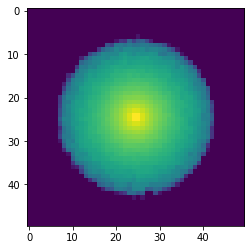

In [2]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_train[0].dtype)
print(x_train[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_train[200])
pyplot.show()

In [3]:
import numpy as np
import pandas as pd

In [4]:
arr = np.genfromtxt('2dft.dat')
arr = np.reshape(arr, [1000, 50, 50])


<Figure size 432x288 with 0 Axes>

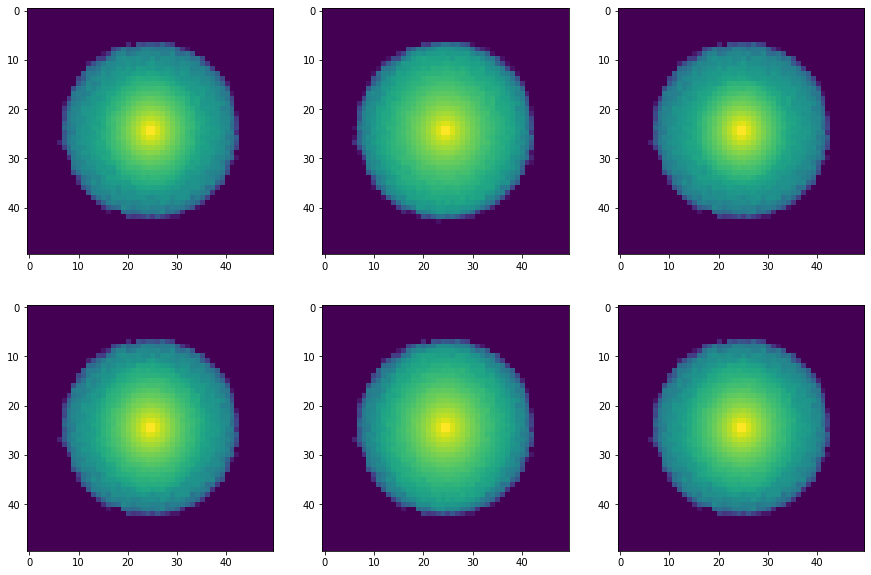

In [5]:
%matplotlib inline
pyplot.figure();
f, axs = pyplot.subplots(2, 3, figsize=(15,10));
axs[0][0].imshow(arr[5]);
axs[0][1].imshow(arr[15]);
axs[0][2].imshow(arr[25]);
axs[1][0].imshow(arr[35]);
axs[1][1].imshow(arr[45]);
axs[1][2].imshow(arr[55]);
pyplot.show();

In [6]:
from sklearn import model_selection

x_dataset_series = np.genfromtxt('2dft.dat', autostrip=True, max_rows=nmodel*n_mesh3)
y_dataset1 = np.genfromtxt('2dftn1.dat', autostrip=True, max_rows=nmodel)
y_dataset2 = np.genfromtxt('2dftn2.dat', autostrip=True, max_rows=nmodel)

x_dataset = x_train_series.reshape(nmodel, n_mesh3)
y_dataset = np.c_[y_train1, y_train2]

NameError: name 'x_train_series' is not defined

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, test_size=0.2)

In [ ]:
print(model.metrics_names)